# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [10]:
import pandas as pd
import numpy as np
import matplotlib

## Read in the file `craftcans.csv`, and look at the first first rows

In [11]:
ignore_na = ['Does not apply','NaN','nan']

df = pd.read_csv("craftcans.csv",na_values = ignore_na)

df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.30%,35.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100.0
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.00%,35.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85.0


## How many rows do you have in the data? What are the column types?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Beer      2416 non-null   object 
 1   Brewery   2410 non-null   object 
 2   Location  2410 non-null   object 
 3   Style     2405 non-null   object 
 4   Size      2410 non-null   object 
 5   ABV       2348 non-null   object 
 6   IBUs      1405 non-null   float64
dtypes: float64(1), object(6)
memory usage: 132.2+ KB


# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [13]:
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
Bonfire Brewing Company       19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [14]:
df.ABV.value_counts().head(10)

5.00%    215
5.50%    158
6.00%    125
6.50%    123
5.20%    107
7.00%     92
4.50%     89
4.80%     72
5.80%     66
5.60%     66
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [15]:
df.ABV

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [16]:
df.ABV = df.ABV.str.replace('%','')

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [17]:
df['ABV'] = df['ABV'].astype(float)

df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [18]:
print(f'Mean:{df.ABV.mean().round(1)} & Median: {df.ABV.median()}')


AttributeError: 'float' object has no attribute 'round'

<AxesSubplot:>

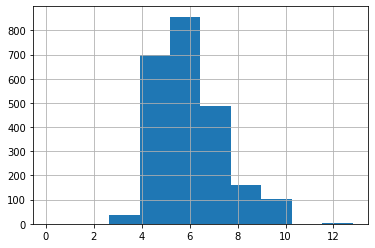

In [396]:
df['ABV'].hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [397]:
df[df['ABV'].isnull()]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
94,Bastian,James Page Brewing Company,"Stevens Point, WI",American Strong Ale,12 oz.,NaN,NaN
199,Professor Black,Blue Owl Brewing,"Austin, TX",American Stout,12 oz.,NaN,NaN
200,Little Boss,Blue Owl Brewing,"Austin, TX",American Pale Wheat Ale,12 oz.,NaN,NaN
201,Van Dayum!,Blue Owl Brewing,"Austin, TX",American Amber / Red Ale,12 oz.,NaN,NaN
202,Spirit Animal,Blue Owl Brewing,"Austin, TX",American Pale Ale (APA),12 oz.,NaN,NaN
...,...,...,...,...,...,...,...
2357,Lift Bridge Brown Ale,Keweenaw Brewing Company,"Houghton, MI",American Brown Ale,12 oz.,NaN,NaN
2358,Pick Axe Blonde Ale,Keweenaw Brewing Company,"Houghton, MI",American Blonde Ale,12 oz.,NaN,NaN
2359,Red Jacket Amber Ale,Keweenaw Brewing Company,"Houghton, MI",American Amber / Red Ale,12 oz.,NaN,NaN
2374,(16 oz.) (2010),NaN,NaN,NaN,NaN,NaN,NaN


In [399]:
df['ABV'].isnull().value_counts()

False    2348
True       68
Name: ABV, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [400]:
df['Location'].value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [401]:
df[df['Location'] == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most cans of beer?

In [402]:
df[df['Location'] == 'Brooklyn, NY']['Brewery'].value_counts()

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [403]:
df[df['Brewery'] == 'Sixpoint Craft Ales']['Style'].value_counts().head(5)

American IPA       4
German Pilsener    2
Rye Beer           2
Baltic Porter      2
Cream Ale          2
Name: Style, dtype: int64

In [404]:
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.3,35.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.0,35.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0


## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [408]:
df_city_state = df["Location"].str.split(", ", expand=True).rename(
    columns={0: 'city', 1:'state'})

df = pd.concat([df,df_city_state],axis=1)

In [409]:
df[df['state'] == 'NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs,city,state
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0,Brooklyn,NY
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0,Brooklyn,NY
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN,Brooklyn,NY
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN,Brooklyn,NY
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0,Brooklyn,NY
...,...,...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,NaN,Brooklyn,NY
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,NaN,Garrattsville,NY
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,NaN,Garrattsville,NY
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,NaN,Garrattsville,NY



### Now *count* all of the breweries in New York state

In [410]:
df[df['state'] == 'NY']['Brewery'].value_counts()

Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Blue Point Brewing Company        4
Butternuts Beer and Ale           4
KelSo Beer Company                3
The Bronx Brewery                 3
Upstate Brewing Company           2
Montauk Brewing Company           2
Bomb Beer Company                 2
Chatham Brewing                   2
Southampton Publick House         1
Dundee Brewing Company            1
Newburgh Brewing Company          1
The Manhattan Brewing Company     1
Name: Brewery, dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [411]:
df[df['Style'].str.contains("IPA",na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,city,state
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0,Minneapolis,MN
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,Louisville,KY
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0,Louisville,KY
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0,Louisville,KY
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0,San Diego,CA
...,...,...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0,Brooklyn Center,MN
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99.0,Brooklyn Center,MN
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0,San Francisco,CA
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0,Longmont,CO


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [412]:
df.describe()

,ABV,IBUs
count,2348.000000,1405.000000
mean,5.977342,42.713167
std,1.354173,25.954066
min,0.100000,4.000000
25%,5.000000,21.000000
50%,5.600000,35.000000
75%,6.700000,64.000000
max,12.800000,138.000000


### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [413]:
df['IBUs'].unique()

array([ 50.,  26.,  19.,  38.,  25.,  47.,  68.,  80.,  42.,  21.,  13.,
        17.,  nan,  65.,  20.,  18.,  15.,  45., 100.,  85.,  24.,  30.,
        28.,  16.,  75.,  35.,  54.,  12.,  10.,  40.,  72.,  90.,  46.,
        64.,  31.,  37.,  27.,  58.,  29.,  23.,  22.,  11.,  60.,   8.,
        34.,  52.,  70.,  51.,  44.,  33.,   5.,  82., 115.,  69.,  55.,
        63.,  67.,  93.,  66., 126.,  61.,  36.,  87.,  88., 103.,   6.,
         9.,  14.,  49.,  32.,  89.,  43.,  71.,   7.,  73.,  41.,  53.,
        62.,  77.,  86., 118.,  81., 130.,  99.,  76.,  48.,  39.,  83.,
       108.,  74., 104., 110., 111., 135.,  95.,  92.,  78., 101.,  94.,
        98.,  57.,   4., 120., 138., 105.,  91.,  97., 113.])

In [414]:
df['IBUs'] = df['IBUs'].astype(float)
df['IBUs'].mean().round(2)

42.71

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<AxesSubplot:>

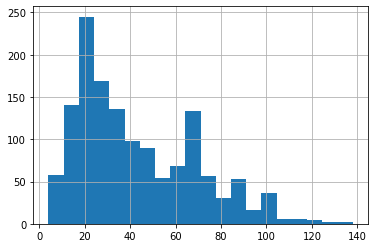

In [415]:
df['IBUs'].hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [416]:
high_ibu = df[df['IBUs'] > df.IBUs.quantile(0.75)]

In [417]:
high_ibu

,Beer,Brewery,Location,Style,Size,ABV,IBUs,city,state
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,Louisville,KY
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0,Louisville,KY
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0,Louisville,KY
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0,Louisville,KY
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0,Framingham,MA
...,...,...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0,San Francisco,CA
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0,Longmont,CO
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0,Longmont,CO
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0,Longmont,CO


## List all of the beers with IBUs below the 25th percentile

In [418]:
low_ibu = df[df['IBUs'] < df.IBUs.quantile(0.25)]

low_ibu

,Beer,Brewery,Location,Style,Size,ABV,IBUs,city,state
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0,Minneapolis,MN
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0,Louisville,KY
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0,Louisville,KY
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0,Louisville,KY
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0,Framingham,MA
...,...,...,...,...,...,...,...,...,...
2372,Bombshell Blonde,Southern Star Brewing Company,"Conroe, TX",American Blonde Ale,12 oz.,5.0,20.0,Conroe,TX
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.5,18.0,Lahaina,HI
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.6,11.0,Pottstown,PA
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.1,20.0,Brooklyn Center,MN


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

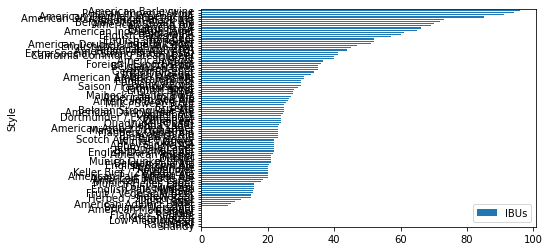

In [420]:
# Not sure if this is what we are looking for..

df.groupby(by='Style').median('IBUs').sort_values(by='IBUs',ascending=False).plot.barh(y='IBUs').invert_yaxis()

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [421]:
high_ibu.groupby(by='Style').median('IBUs').head(5)

,ABV,IBUs
Style,,
American Amber / Red Ale,7.2,80.0
American Barleywine,9.9,96.0
American Black Ale,7.3,80.0
American Brown Ale,6.5,65.0
American Double / Imperial IPA,8.7,93.0


In [422]:
low_ibu.groupby(by='Style').median('IBUs').head(5)

,ABV,IBUs
Style,,
Altbier,5.3,18.0
American Adjunct Lager,4.7,9.0
American Amber / Red Ale,5.4,18.0
American Amber / Red Lager,4.6,18.0
American Black Ale,5.2,9.0


## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [423]:
list = ['Witbier','Hefeweizen','American Pale Wheat Ale']

df[df['Style'].isin(list)].groupby(by='Style').median('IBUs')

,ABV,IBUs
Style,,
American Pale Wheat Ale,4.8,20.0
Hefeweizen,5.0,15.0
Witbier,5.0,15.5


## Draw a histogram of the IBUs of those beers

array([[<AxesSubplot:title={'center':'IBUs'}>]], dtype=object)

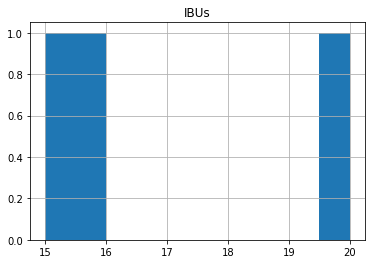

In [426]:
df[df['Style'].isin(list)].groupby(by='Style').median('IBUs').hist('IBUs')

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [427]:
df[df['Style'].str.contains("IPA",na=False)].groupby(by='Style').median('IBUs')

,ABV,IBUs
Style,,
American Double / Imperial IPA,8.7,91.0
American IPA,6.5,69.0
American White IPA,6.0,45.0
Belgian IPA,7.0,61.0
English India Pale Ale (IPA),6.3,47.0


array([[<AxesSubplot:title={'center':'IBUs'}>]], dtype=object)

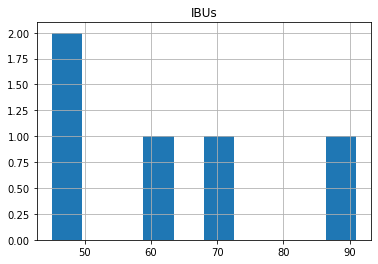

In [429]:
df[df['Style'].str.contains("IPA",na=False)].groupby(by='Style').median('IBUs').hist('IBUs')

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

array([<AxesSubplot:title={'center':'IBUs'}>], dtype=object)

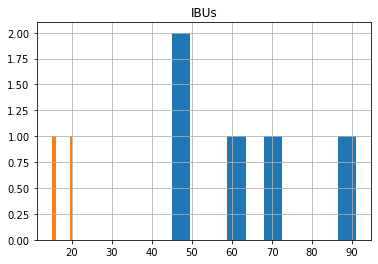

In [431]:
ax = df[df['Style'].str.contains("IPA",na=False)].groupby(by='Style').median('IBUs').hist('IBUs')

df[df['Style'].isin(list)].groupby(by='Style').median('IBUs').hist('IBUs',ax=ax)

# side by side works?

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [432]:
df['Style'].sort_values().unique()

array(['Abbey Single Ale', 'Altbier', 'American Adjunct Lager',
       'American Amber / Red Ale', 'American Amber / Red Lager',
       'American Barleywine', 'American Black Ale', 'American Blonde Ale',
       'American Brown Ale', 'American Dark Wheat Ale',
       'American Double / Imperial IPA',
       'American Double / Imperial Pilsner',
       'American Double / Imperial Stout', 'American IPA',
       'American India Pale Lager', 'American Malt Liquor',
       'American Pale Ale (APA)', 'American Pale Lager',
       'American Pale Wheat Ale', 'American Pilsner', 'American Porter',
       'American Stout', 'American Strong Ale', 'American White IPA',
       'American Wild Ale', 'Baltic Porter', 'Belgian Dark Ale',
       'Belgian IPA', 'Belgian Pale Ale', 'Belgian Strong Dark Ale',
       'Belgian Strong Pale Ale', 'Berliner Weissbier', 'Bière de Garde',
       'Bock', 'Braggot', 'California Common / Steam Beer', 'Chile Beer',
       'Cider', 'Cream Ale', 'Czech Pilsener', 'Doppe

In [443]:
ABV_list= ['IPA','Hefeweizen','American Pale Wheat Ale','Wheat']

# transform to regex
ABV_list = '|'.join(ABV_list)

ipa_wit = df[df['Style'].str.contains(ABV_list,na=False)]

In [454]:
ipa_wit['Style_Type'] = np.where((ipa_wit.Style.str.contains('IPA')), 'IPA', 'Wheat')

ipa_wit.sort_values(by='IBUs')

<ipython-input-454-c62e971d241d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Beer,Brewery,Location,Style,Size,ABV,IBUs,city,state,Style_Type
313,Mr. Blue Sky,Griffin Claw Brewing Company,"Birmingham, MI",American Pale Wheat Ale,16 oz.,4.5,6.0,Birmingham,MI,Wheat
1842,Point Nude Beach Summer Wheat (2011),Stevens Point Brewery,"Stevens Point, WI",American Pale Wheat Ale,12 oz.,5.0,7.0,Stevens Point,WI,Wheat
1505,Samuel Adams Summer Ale,Boston Beer Company,"Boston, MA",American Pale Wheat Ale,12 oz.,5.3,7.0,Boston,MA,Wheat
1426,Point Nude Beach Summer Wheat,Stevens Point Brewery,"Stevens Point, WI",American Pale Wheat Ale,16 oz.,5.2,7.0,Stevens Point,WI,Wheat
1801,Point Nude Beach Summer Wheat,Stevens Point Brewery,"Stevens Point, WI",American Pale Wheat Ale,12 oz.,5.0,7.0,Stevens Point,WI,Wheat
...,...,...,...,...,...,...,...,...,...,...
2341,Epic IPA,Mammoth Brewing Company,"Mammoth Lakes, CA",American IPA,12 oz.,6.5,NaN,Mammoth Lakes,CA,IPA
2344,Sunshine Wheat Beer (2009),New Belgium Brewing Company,"Fort Collins, CO",American Pale Wheat Ale,12 oz.,4.8,NaN,Fort Collins,CO,Wheat
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,NaN,Garrattsville,NY,Wheat
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,NaN,Garrattsville,NY,IPA


In [459]:
px.scatter(ipa_wit,x='IBUs',y='ABV',color='Style_Type',hover_data=['Beer'])

## Good work!

If you made it this far you deserve a drink.

In [ ]:
# o/